In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [131]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/ODS/ObesityDataSet.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
df = pd.read_csv(file_path, na_values='?', skipinitialspace=True)

# EDA

In [133]:
# Tampilkan beberapa baris pertama
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [135]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [136]:
df.dtypes

,0
Age,float64
Gender,object
Height,float64
Weight,float64
CALC,object
FAVC,object
FCVC,float64
NCP,float64
SCC,object
SMOKE,object


In [137]:
# Cek missing values
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [138]:
# Cek unique values
df.nunique()

,0
Age,1393
Gender,2
Height,1561
Weight,1517
CALC,4
FAVC,2
FCVC,807
NCP,636
SCC,2
SMOKE,2


In [139]:
# Cek duplikasi
print(df.duplicated().sum())

18


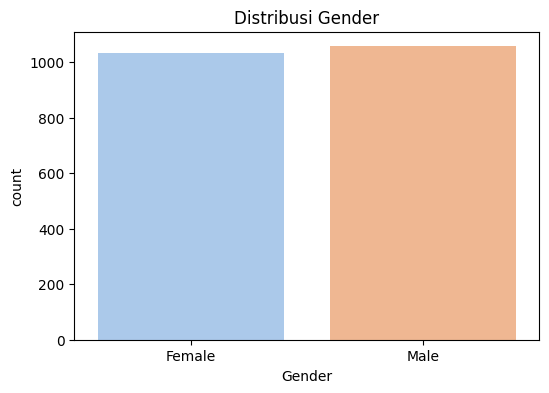

In [140]:
# Visualisasi distribusi Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title("Distribusi Gender")
plt.show()

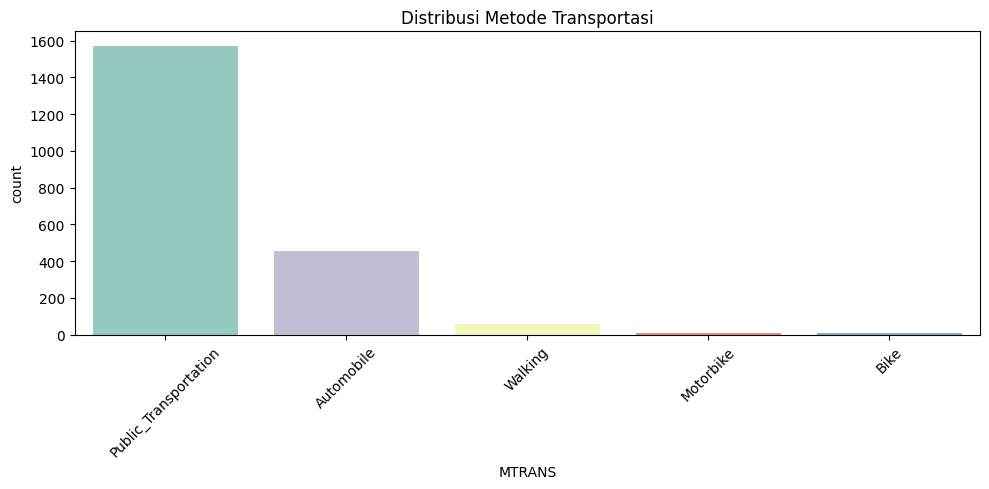

In [141]:
# Visualisasi distribusi Metode Transportasi
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='MTRANS', hue='MTRANS', order=df['MTRANS'].value_counts().index, palette='Set3', legend=False)
plt.title("Distribusi Metode Transportasi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

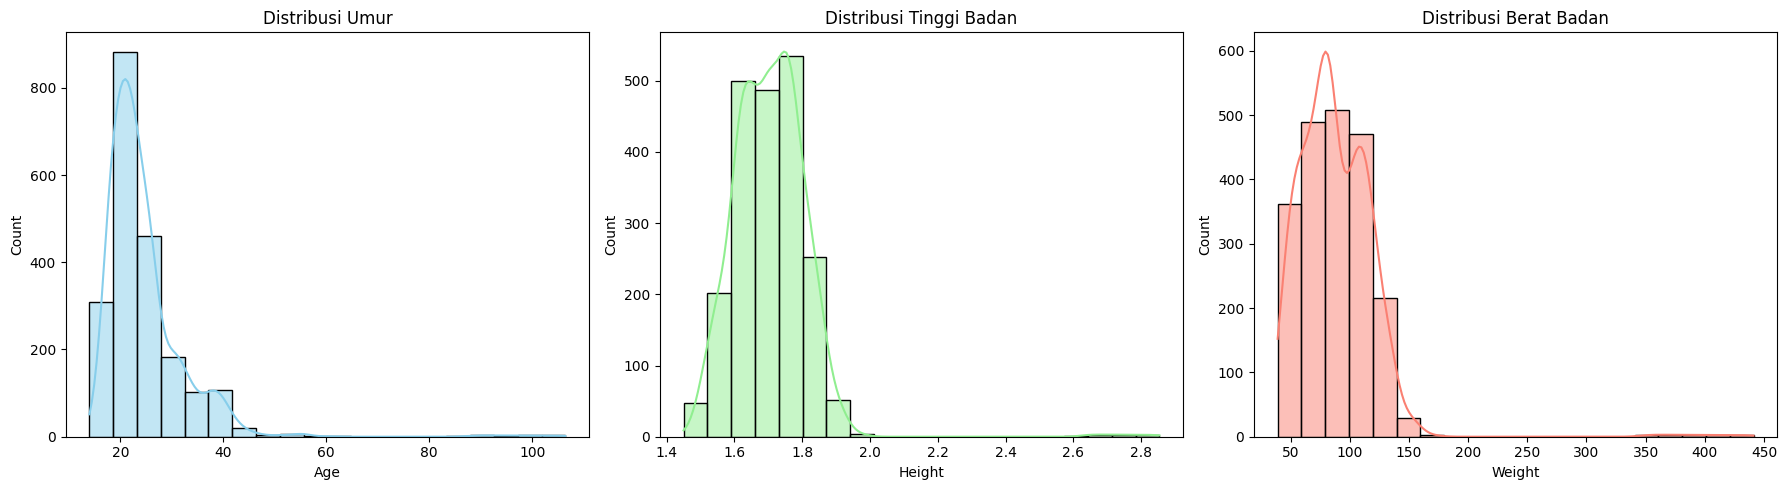

In [142]:
# Histogram kolom numerik
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribusi Umur")

sns.histplot(df['Height'], bins=20, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title("Distribusi Tinggi Badan")

sns.histplot(df['Weight'], bins=20, kde=True, ax=axes[2], color='salmon')
axes[2].set_title("Distribusi Berat Badan")
plt.tight_layout()
plt.show()

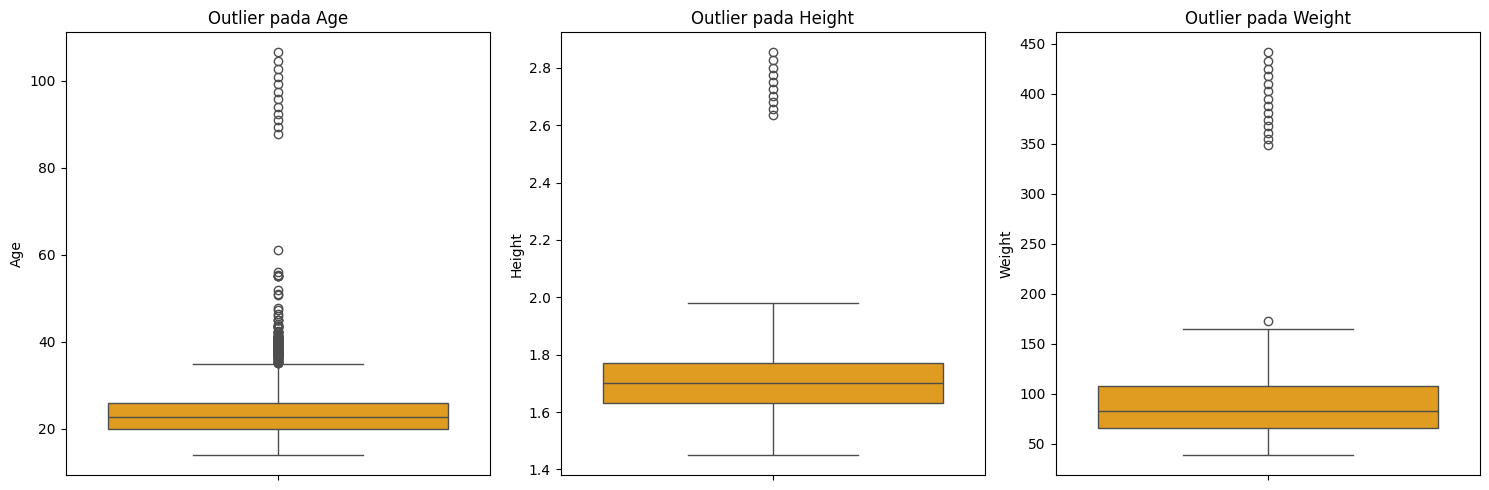

In [143]:
# Boxplot deteksi outlier
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Height', 'Weight']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()

Kesimpulan :

# Preprocessing Data

In [144]:
# Konversi numerik
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

In [145]:
# Hapus missing values
df = df.dropna()

In [146]:
# Hapus duplikat
df = df.drop_duplicates()

In [147]:
# Tangani outlier dengan IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

for col in ['Age', 'Height', 'Weight']:
    df = remove_outliers_iqr(df, col)

In [148]:
# Label Encoding untuk kolom kategorik
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'NObeyesdad':
        le = LabelEncoder()
        df.loc[:, col] = le.fit_transform(df[col])  # Gunakan .loc untuk menghindari warning
        label_encoders[col] = le

In [149]:
# Encode target
target_le = LabelEncoder()
df['NObeyesdad'] = target_le.fit_transform(df['NObeyesdad'])

In [150]:
# Pisahkan fitur dan target
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

In [151]:
# SMOTE untuk menangani ketidakseimbangan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [152]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [153]:
# Cek hasil
print("Jumlah data setelah preprocessing:", X_scaled.shape)
print("Distribusi target setelah SMOTE:\n", pd.Series(y_resampled).value_counts())

Jumlah data setelah preprocessing: (1848, 16)
Distribusi target setelah SMOTE:
 NObeyesdad
1    264
5    264
6    264
2    264
0    264
3    264
4    264
Name: count, dtype: int64


Kesimpulan :

# Pemodelan dan Evaluasi

In [154]:
# Gunakan X_scaled dan y_resampled dari preprocessing
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [155]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

In [156]:
# Simpan skor evaluasi
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

In [157]:
# Tampilkan hasil evaluasi
for name, scores in results.items():
    print(f"\nModel: {name}")
    print(f"Akurasi   : {scores['Accuracy']:.4f}")
    print(f"Presisi   : {scores['Precision']:.4f}")
    print(f"Recall    : {scores['Recall']:.4f}")
    print(f"F1-Score  : {scores['F1-Score']:.4f}")
    print("Confusion Matrix:")
    print(scores['Confusion Matrix'])


Model: Logistic Regression
Akurasi   : 0.8541
Presisi   : 0.8583
Recall    : 0.8541
F1-Score  : 0.8518
Confusion Matrix:
[[51  1  0  0  0  0  0]
 [12 33  0  0  0  7  1]
 [ 0  0 43  1  1  2  6]
 [ 0  0  1 52  0  0  0]
 [ 0  0  0  0 53  0  0]
 [ 0  4  0  0  0 42  7]
 [ 0  1  3  0  0  7 42]]

Model: Random Forest
Akurasi   : 0.9405
Presisi   : 0.9459
Recall    : 0.9405
F1-Score  : 0.9413
Confusion Matrix:
[[51  1  0  0  0  0  0]
 [ 1 49  0  0  0  3  0]
 [ 0  2 51  0  0  0  0]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 53  0  0]
 [ 0  8  0  0  0 45  0]
 [ 0  3  3  1  0  0 46]]

Model: SVM
Akurasi   : 0.8892
Presisi   : 0.8978
Recall    : 0.8892
F1-Score  : 0.8905
Confusion Matrix:
[[49  3  0  0  0  0  0]
 [ 4 46  0  0  0  1  2]
 [ 0  4 48  0  0  1  0]
 [ 0  1  0 52  0  0  0]
 [ 0  0  0  0 53  0  0]
 [ 0  9  0  1  0 38  5]
 [ 0  5  1  0  0  4 43]]


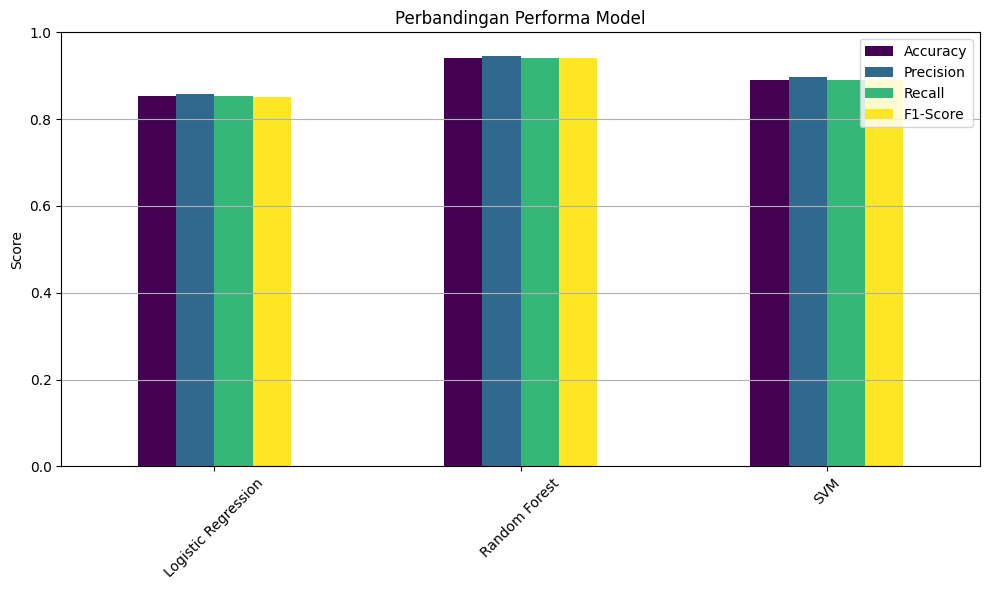


===== Total Score dari Setiap Model =====
Logistic Regression: Total = 3.4183 (A=0.8541, P=0.8583, R=0.8541, F1=0.8518)
Random Forest: Total = 3.7683 (A=0.9405, P=0.9459, R=0.9405, F1=0.9413)
SVM: Total = 3.5667 (A=0.8892, P=0.8978, R=0.8892, F1=0.8905)


In [183]:
# Visualisasi Perbandingan
metrics_df = pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
metrics_df.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Perbandingan Performa Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tampilkan total skor (jumlah dari Accuracy + Precision + Recall + F1-Score)
print("\n===== Total Score dari Setiap Model =====")
for name, scores in results.items():
    total_score = scores['Accuracy'] + scores['Precision'] + scores['Recall'] + scores['F1-Score']
    print(f"{name}: Total = {total_score:.4f} (A={scores['Accuracy']:.4f}, P={scores['Precision']:.4f}, R={scores['Recall']:.4f}, F1={scores['F1-Score']:.4f})")


Kesimpulan :

# Hyperparameter Tuning

In [172]:
# Split data (gunakan kembali X_scaled dan y_resampled dari preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [173]:
# Skor sebelum tuning (disimpan sebelumnya)
before_tuning = {}

In [174]:
# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='f1_weighted')
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test)


In [175]:
# 2. Random Forest
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1_weighted')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

In [176]:
# 3. SVM
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='f1_weighted')
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test)

In [177]:
# Evaluasi ulang model setelah tuning
after_tuning = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Precision': precision_score(y_test, y_pred_lr, average='weighted'),
        'Recall': recall_score(y_test, y_pred_lr, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_lr, average='weighted')
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
        'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_rf, average='weighted')
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'Precision': precision_score(y_test, y_pred_svm, average='weighted'),
        'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_svm, average='weighted')
    }
}

In [180]:
# Tampilkan hasil skor total
print("\n===== Total Score dari Setiap Model (Setelah Tuning) =====")
for model_name, scores in after_tuning.items():
    total_score = sum(scores.values())
    print(f"{model_name}: Total = {total_score:.4f} (A={scores['Accuracy']:.4f}, P={scores['Precision']:.4f}, R={scores['Recall']:.4f}, F1={scores['F1-Score']:.4f})")


===== Total Score dari Setiap Model (Setelah Tuning) =====
Logistic Regression: Total = 3.7765 (A=0.9432, P=0.9477, R=0.9432, F1=0.9424)
Random Forest: Total = 3.7984 (A=0.9486, P=0.9521, R=0.9486, F1=0.9490)
SVM: Total = 3.8605 (A=0.9649, P=0.9660, R=0.9649, F1=0.9647)


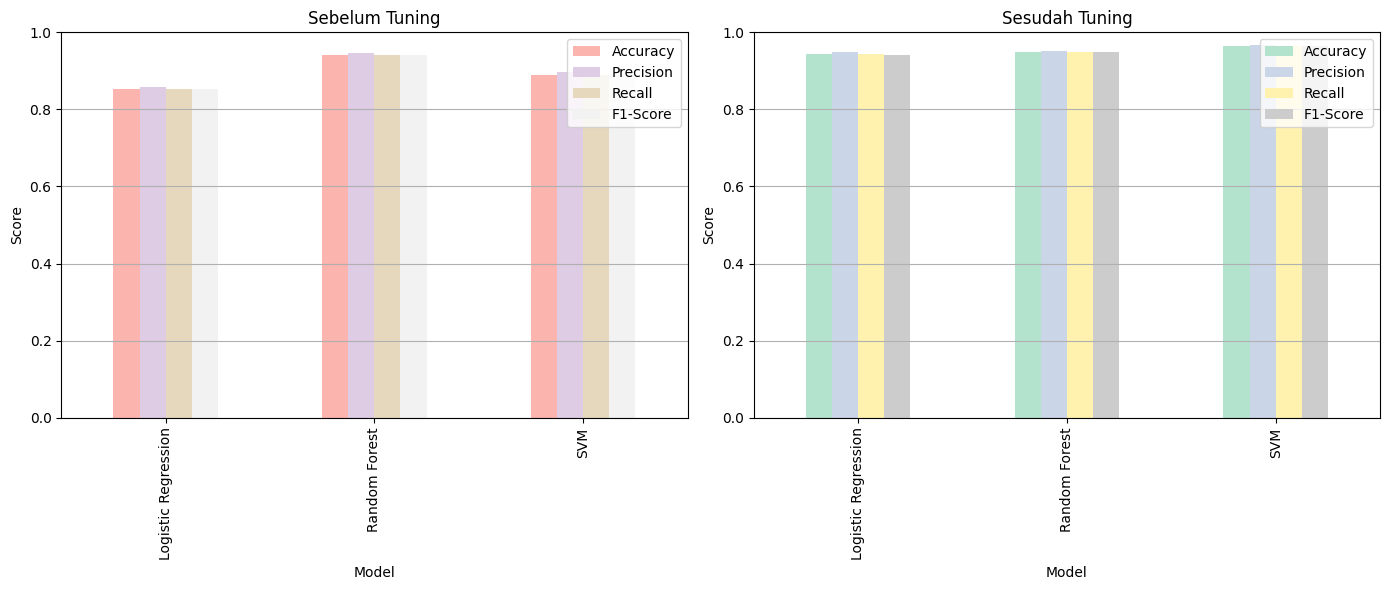

In [181]:
# Visualisasi Perbandingan Sebelum dan Sesudah Tuning
before_df = pd.DataFrame(metrics_df).rename_axis('Model').reset_index()
after_df = pd.DataFrame(after_tuning).T.rename_axis('Model').reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
before_df.plot(x='Model', kind='bar', ax=axes[0], title='Sebelum Tuning', colormap='Pastel1')
after_df.plot(x='Model', kind='bar', ax=axes[1], title='Sesudah Tuning', colormap='Pastel2')
for ax in axes:
    ax.set_ylim(0, 1)
    ax.set_ylabel("Score")
    ax.grid(axis='y')
plt.tight_layout()
plt.show()

In [186]:
import joblib

# save model
joblib.dump(lr_best, "logistic_regression_best.joblib")
joblib.dump(rf_best, "random_forest_best.joblib")
joblib.dump(svm_best, "svm_best.joblib")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model telah disimpan.")

Model telah disimpan.


Kesimpulan :